# **GENERADOR DE LETRAS DE CANCIONES EN ESPAÑOL E INGLÉS**
## **PROYECTO FINAL DE MÉTODOS DE COMPUTACIÓN INTENSIVA**
### **UNIVERSIDAD NACIONAL DE COLOMBIA**

##### **PRESENTADO POR:**
*Erika Johanna Martínez Salinas*

*Andrea Catalina García Montoya*

# Generador de Letras de Canciones

El objetivo de este proyecto es generar letras de canciones sintéticas, a partir de la inclusión de una o varias palabras sobre la temática con la que se desea la letra de la canción.

Para ello, vamos a utilizar redes de memoria a largo y corto plazo (LSTM). Este tipo de redes neuronales recurrentes (RNN) son muy utilizadas en tareas de procesamiento de lenguaje natural. El modelo se entrena con un *conjunto de datos que contiene letras de canciones en español y en inglés* preparado por nosotras, el análisis exploratorio de los datos se puede encontrar en el notebook: `Análisis exploratorio datos.ipynb`, el generador de letras en español e inglés en el notebook: `Generador de letras.ipynb`
y el conjunto de datos utilizado se encuentra en (https://github.com/Erika316/GeneradorCancionesNPL/blob/main/spotify_millsongdata.csv.zip)

## 1. Importación de librerías


Lo primero que haremos es importar las librerías necesarias para el ejercicio, en clase vimos el uso de la librería Tensorflow, la cual será la que utilizarémos en este ejercicio.

In [ ]:
# Librerías

# Paquetes
import numpy as np
import pandas as pd
import tensorflow as tf
import requests
from io import StringIO
# Paquetes visualización
import matplotlib.pyplot as plt


import os
import json

In [ ]:
pip install transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 57.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 39.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 87.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.6 MB/s eta 0:00:00


In [ ]:
pip install pyyaml==5.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 3.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [ ]:
pip install plotly_express

In [ ]:
pip install torch

In [ ]:
# Paquetes básicos
import pandas as pd
import plotly.express as plx
import numpy as np
import plotly.graph_objects as go
import os
import time
import datetime
# Pytorch
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils.data import Dataset, random_split, DataLoader, RandomSampler, SequentialSampler
# Texto
from transformers import GPT2LMHeadModel, GPT2Tokenizer
from transformers import get_scheduler
import random
from transformers import GPT2Tokenizer, GPT2LMHeadModel, GPT2Config, AdamW, get_linear_schedule_with_warmup
from tqdm import tqdm, trange
from transformers import pipeline
# Sklearn
from sklearn.model_selection import train_test_split
# Funciones y variables
def format_time(elapsed): return str(datetime.timedelta(seconds=int(round((elapsed)))))

## Fijar el directorio de trabajo

In [ ]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

# Ruta a la carpeta deseada
ruta_deseada = '/content/drive/My Drive/Colab Notebooks'

# Cambiar el directorio de trabajo
os.chdir(ruta_deseada)

# Verificar el nuevo directorio de trabajo
print("Nuevo directorio de trabajo:", os.getcwd())

Nuevo directorio de trabajo: /content/drive/My Drive/Colab Notebooks


Se recopilaron dos base de datos con letras de canciones en inglés y en español, se almacenaron en formato CSV y se organizaron en las siguientes columnas:

Canciones en inglés:
*   artist.
*   song.
*   link.
*   text.

Canciones en español:
*   artista.
*   canción.
*   album.
*   letra.
*   año.
*   visitas.

Los datos se encuentran almacenados en el repositorio GitHub: https://github.com/Erika316/GeneradorCancionesNPL/raw/main/hhgroups_merge_28_05.csv.zip y en https://github.com/CatalinaGMR/ProyectoGeneradordeTexto/raw/main/spotify_millsongdata.csv.zip

A continuación, se agrupan las canciones por artista para ver una descripción global de los datos.


#1.1 Lectura de los datos

Mostrarémos la base de datos y sus especificidades.

### Carga de datos en inglés

In [ ]:
url = 'https://github.com/CatalinaGMR/ProyectoGeneradordeTexto/raw/main/spotify_millsongdata.csv.zip'
# Carga de la base
letras_df = pd.read_csv(url)
print(letras_df.shape)

(57650, 4)


In [ ]:
letras_df.head(10)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \r\nA..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \r\nTouch me gen..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \r\nWhy I had...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
5,ABBA,Burning My Bridges,/a/abba/burning+my+bridges_20003011.html,"Well, you hoot and you holler and you make me ..."
6,ABBA,Cassandra,/a/abba/cassandra_20002811.html,Down in the street they're all singing and sho...
7,ABBA,Chiquitita,/a/abba/chiquitita_20002978.html,"Chiquitita, tell me what's wrong \r\nYou're e..."
8,ABBA,Crazy World,/a/abba/crazy+world_20003013.html,I was out with the morning sun \r\nCouldn't s...
9,ABBA,Crying Over You,/a/abba/crying+over+you_20177611.html,I'm waitin' for you baby \r\nI'm sitting all ...


In [ ]:
letras_df.describe()

,artist,song,link,text
count,57650,57650,57650,57650
unique,643,44824,57650,57494
top,Donna Summer,Have Yourself A Merry Little Christmas,/a/abba/ahes+my+kind+of+girl_20598417.html,I just came back from a lovely trip along the ...
freq,191,35,1,6


### Carga de canciones en español

In [ ]:
url_esp = 'https://github.com/Erika316/GeneradorCancionesNPL/raw/main/hhgroups_merge_28_05.csv.zip'
# Load letas dataset
letras_esp_df = pd.read_csv(url_esp)
print(letras_esp_df.shape)

(9325, 7)


In [ ]:
letras_esp_df.head(10)

,id,artista,cancion,album,letra,anyo,visitas
0,0,Denom,Machete (con Jarfaiter y Gente jodida),Medicina,"Para su nuevo disco ""Medicina"", Denom ha vuelt...",2019,126
1,1,Denom,Vacío (con Ivo Incuerdo),Medicina,"[Denom]\nYo que quería, yo que pedía vida,\nSe...",2019,361
2,2,Denom,El orgullo es fiel (con Juancho Marqués y Elio...,Medicina,"""El orgullo es fiel"" es uno de los cortes incl...",2019,262
3,3,Denom,Mueve mueve (con Fernandocosta),Medicina,"[Estribillo: Denom] (x2)\nMueve, mueve, mueve,...",2019,578
4,4,Jaro Desperdizio,Insomnia,"Sin álbum, es un vídeo suelto","[Estribillo]\nY en esta noche, ¿Quién me arrop...",2019,219
5,5,Khan,Lobo,"Sin álbum, es un vídeo suelto",Que nadie creía en leyends hasta que llegué yo...,2019,683
6,6,Dyo,Claridad [Productor desconocido],"Sin álbum, es un tema suelto","Me olvidé tomarme la pastilla otra vez,\nEstar...",2019,58
7,7,Sheldrack,Especial agradecimiento,Titiritero,Hace tiempo dejé de buscar el sentido de la vi...,2018,35
8,8,Arce,Huella (con Pitizion),Pedigrí,[Estribillo: Pitizon]\nNo te voy a negar que a...,2019,119
9,9,Arce,Boxer,Pedigrí,"Se preguntaron dónde está, me perdí como Wally...",2019,843


## Selección de letras

Vamos a acotar nuestro conjunto de datos, eliminamos datos faltantes y además eliminamos todas las canciones que superan una extensión de 1000 caracteres.

In [ ]:
# Eliminar nulos
letras_df = letras_df.dropna()

In [ ]:
def letra_to_string(letra):
  return f'\n{letra["text"]}\n{letra["artist"]}\n{letra["text"]}'

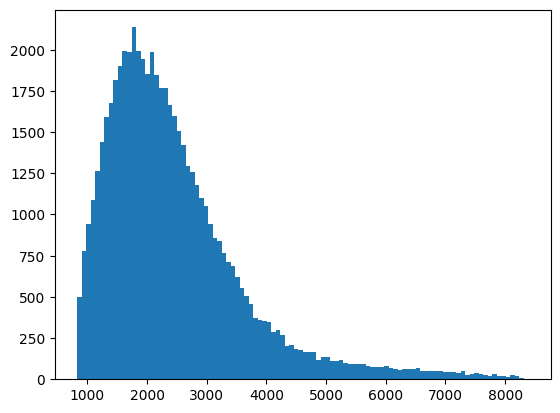

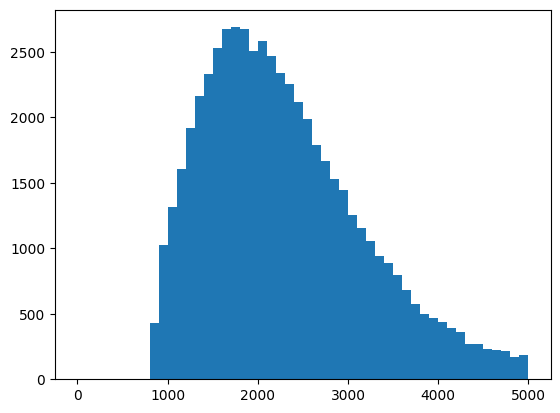

Hay  1457 letras de canciones luego de la selección de máximo de caracteres.


In [ ]:
#Filtrando canciones
letras_df['string'] = letras_df.apply(lambda row: f'\n{row["text"]}\n\n{row["artist"]}\n\n{row["text"]}', axis=1)
letras_df['length'] = letras_df.string.map(len)

#Histograma
plt.hist(letras_df['length'].values, bins=100)
plt.show()
plt.hist(letras_df['length'].values, range=(0,5000), bins=50)
plt.show()

#Seleccionamos un máximo de 1000 caracteres
MAX_LETTER_LONG=1000
letras_filtradas = letras_df[letras_df.length<MAX_LETTER_LONG]

print('Hay ', len(letras_filtradas), 'letras de canciones luego de la selección de máximo de caracteres.')

## Creación de vocabulario

Debemos construir un vocabulario. Para ello, usaremos un modelo de lenguaje a nivel de carácter basado en una red **LSTM (long-short-term-memory)** **multicapa (a diferencia del modelo de lenguaje a nivel de palabras)**. Esto quiere decir que en lugar de crear índices únicos para palabras, crearemos índices únicos para caracteres. Al hacer eso, permitimos que la red prediga el siguiente carácter en lugar de la siguiente palabra en una secuencia. Así que tendremos muchos caracteres como 'a', '\n', 'A', 'á'...

In [ ]:
letras_string=letras_filtradas.string

Primero, se obtiene el resultado para cada artista. Dado que la red neuronal utiliza números en lugar de cadenas, convertimos cada carácter en un número.

In [ ]:
STOP_SIGN = '␣'

tokenizer = tf.keras.preprocessing.text.Tokenizer(
    char_level=True,
    filters='',
    lower=False,
    split=''
)

# Tokenizador de las palabras vacías.
tokenizer.fit_on_texts([STOP_SIGN])

tokenizer.fit_on_texts(letras_string)

tokenizer.get_config()

{'num_words': None,
 'filters': '',
 'lower': False,
 'split': '',
 'char_level': True,
 'oov_token': None,
 'document_count': 1458,
 'word_counts': '{"\\u2423": 1, "\\n": 58019, "T": 4880, "h": 45353, "i": 51464, "s": 48445, " ": 284706, "L": 2158, "t": 67218, "l": 45307, "e": 109642, "g": 21518, "o": 79884, "f": 14496, "M": 1835, "n": 62636, "(": 590, ")": 590, ",": 9349, "\\r": 50734, "I": 13488, "\'": 12335, "m": 27422, "A": 4748, "u": 32491, "j": 1368, "a": 67369, "D": 1736, "w": 21257, "y": 30868, "r": 48864, ".": 4568, "v": 11241, "d": 32418, "G": 1405, "S": 3463, "b": 13420, "k": 10480, "c": 14986, "p": 9668, "q": 315, "z": 657, "Y": 2973, "C": 2375, "W": 3815, "N": 1331, "4": 54, "x": 594, "?": 900, "K": 488, "H": 2200, "B": 2394, "E": 1004, "F": 1396, "O": 2068, "\\"": 366, "P": 988, "!": 593, "J": 862, "X": 71, "R": 986, "[": 416, ":": 310, "]": 414, "-": 850, "1": 163, "2": 201, "3": 94, "U": 346, "Z": 59, "V": 274, "0": 80, "5": 19, "6": 32, "8": 44, "9": 79, "7": 29, "Q":

El tamaño del vocabulario es 1458, eso significa que hemos codificado 1457 caracteres diferentes que aparecieron en el conjunto de datos. Muchos de ellos se identifian por los acentos y mayúsculas. Además, el tamaño del conjunto de datos vectorizado 1457.

In [ ]:
VOCABULARY_SIZE = len(tokenizer.word_counts) + 1

print('VOCABULARY_SIZE: ', VOCABULARY_SIZE)

VOCABULARY_SIZE:  79


Dada una palabra podemos obtener su representación numérica y viceversa con el tokenizador.



In [ ]:
print(tokenizer.index_word[5])
print(tokenizer.index_word[10])

t
r


In [ ]:
print(tokenizer.word_index['z'])
print(tokenizer.word_index['i'])

52
8


Finalmente, hemos creado una  secuencia desde un texto dado. Esto convierte el texto en números, por ejemplo, si tomamos "Someone like you" de Adele, obtenemos la siguiente secuencia.

In [ ]:
tokenizer.texts_to_sequences(['someone like you'])

[[11, 3, 17, 2, 3, 6, 2, 1, 13, 8, 26, 2, 1, 16, 3, 14]]

## Vectorización conjunto de datos
Una vez hemos definido el vocabulario, vamos a convertir el conjunto de letras de canciones en secuencias.

Además, creamos una opción inversa, dada una secuencia, podemos convertirla en texto. La idea es convertir un texto en un vector a partir de los números codificados.


In [ ]:
dataset_vectorizado = tokenizer.texts_to_sequences(letras_string)

print('Tamaño del conjunto de datos vectorizado', len(dataset_vectorizado))

Tamaño del conjunto de datos vectorizado 1457


In [ ]:
#Funcion inversa (seq2str)
def letras_sequence_to_string(letras_sequence):
    letras_stringified = tokenizer.sequences_to_texts([letras_sequence])[0]
    print(letras_stringified)

letras_sequence_to_string(dataset_vectorizado[0])


 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 A e r o s m i t h 
 
 
 
 
 
 
 
 
 
 
 
 
 
 



Puesto que la longitud de todas las letras es diferente, es posible que se genere un error en la red neuronal creada.

La red neuronal espera una forma fija para la entrada. Por esta razón, completamos las letras de canciones que tienen una longitud menor a 1000 con el objetivo de que todas las letras tengan un tamaño máximo de caracteres de 1000.

Añadimos estos caracteres con el STOPWORD.

In [ ]:
for letras_index, letras in enumerate(dataset_vectorizado[:10]):
    print('letras #{} length: {}'.format(letras_index + 1, len(letras)))

letras #1 length: 920
letras #2 length: 899
letras #3 length: 960
letras #4 length: 996
letras #5 length: 979
letras #6 length: 904
letras #7 length: 904
letras #8 length: 874
letras #9 length: 936
letras #10 length: 856


In [ ]:
dataset_vectorized_padded_without_stops = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorizado,
    padding='post',
    truncating='post',
    # Usamos -1 acá y 1 en el siguiente paso para asegurarnos
    # que todas las canciones tienen por lo menos un stop al final,
    # Dado que cada secuencia será desplazada y truncada posteriormente
    # (para generar secuencias X e Y).
    maxlen=MAX_LETTER_LONG-1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

dataset_vectorized_padded = tf.keras.preprocessing.sequence.pad_sequences(
    dataset_vectorized_padded_without_stops,
    padding='post',
    truncating='post',
    maxlen=MAX_LETTER_LONG+1,
    value=tokenizer.texts_to_sequences([STOP_SIGN])[0]
)

for letra_index, letra in enumerate(dataset_vectorized_padded[:10]):
    print('Letra #{} longitud: {}'.format(letra_index + 1, len(letra)))

Letra #1 longitud: 1001
Letra #2 longitud: 1001
Letra #3 longitud: 1001
Letra #4 longitud: 1001
Letra #5 longitud: 1001
Letra #6 longitud: 1001
Letra #7 longitud: 1001
Letra #8 longitud: 1001
Letra #9 longitud: 1001
Letra #10 longitud: 1001


Ahora todas las letras tienen la misma longitud, por ejemplo,

In [ ]:
letras_sequence_to_string(dataset_vectorized_padded[1290])


 A   L i t t l e   B i r d   T o l d   M e 
 
 C o n w a y   T w i t t y 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣ ␣


## Creación del conjunto de datos en formato TensorFlow.

Una vez que tenemos el texto convertido en vectores (numpay arrays) tenemos que adaptarlos al formato tensorflow para poder utilizar la librería.

In [ ]:

dataset = tf.data.Dataset.from_tensor_slices(dataset_vectorized_padded)
print(dataset)

<_TensorSliceDataset element_spec=TensorSpec(shape=(1001,), dtype=tf.int32, name=None)>


Ahora, debemos empezar a crear nuestras muestras en inputs (entradas) y target (objetivo-destino). Entonces, dada la entrada, el modelo intentará predecir el objetivo (es decir, la continuación de la entrada).

Son numerosas las combinaciones que se pueden realizar , por ejemplo si tenemos la palabra "Amarse" y la longitud_secuencia es 5, dada "Amars" la secuencia objetivo será "marse".

In [ ]:
def split_input_target(letra):
    input_text = letra[:-1]
    target_text = letra[1:]

    return input_text, target_text

dataset_targeted = dataset.map(split_input_target)

print(dataset_targeted)

<_MapDataset element_spec=(TensorSpec(shape=(1000,), dtype=tf.int32, name=None), TensorSpec(shape=(1000,), dtype=tf.int32, name=None))>


Después, el conjunto de datos es una tupla que contiene (entrada, destino) o en inglés (input, target).

Por ejemplo:

In [ ]:
for input_example, target_example in dataset_targeted.take(5):
    print('Tamaño de secuencia de entrada (input):', repr(len(input_example.numpy())))
    print('Tamaño de secuencia objetivo (target):', repr(len(target_example.numpy())))
    print()

    input_stringified = tokenizer.sequences_to_texts([input_example.numpy()[:5]])[0]
    target_stringified = tokenizer.sequences_to_texts([target_example.numpy()[:5]])[0]

    print('Input:  ', repr(''.join(input_stringified)))
    print('Target: ', repr(''.join(target_stringified)))

Tamaño de secuencia de entrada (input): 1000
Tamaño de secuencia objetivo (target): 1000

Input:   "\n A h e '"
Target:  "A h e ' s"
Tamaño de secuencia de entrada (input): 1000
Tamaño de secuencia objetivo (target): 1000

Input:   '\n B u r n'
Target:  'B u r n i'
Tamaño de secuencia de entrada (input): 1000
Tamaño de secuencia objetivo (target): 1000

Input:   '\n C r y i'
Target:  'C r y i n'
Tamaño de secuencia de entrada (input): 1000
Tamaño de secuencia objetivo (target): 1000

Input:   '\n D i s i'
Target:  'D i s i l'
Tamaño de secuencia de entrada (input): 1000
Tamaño de secuencia objetivo (target): 1000

Input:   '\n E v e r'
Target:  'E v e r y'


**RNN** procesa cada índice de estos vectores como un paso de tiempo.
-   Para la entrada en el paso 0, el modelo recibe el índice de '\n' e intenta predecir el índice para el siguiente carácter.
-   En el siguiente paso de tiempo, hace lo mismo, pero la **RNN** considera el contexto del paso anterior además del carácter de entrada actual.

## División del conjunto de datos por lotes (Batches)

En el contexto del procesamiento del lenguaje natural (NLP) y de los modelos de aprendizaje profundo en general, un "batch" o "lote" se refiere a un conjunto de ejemplos de entrenamiento que se utilizan simultáneamente para actualizar los pesos del modelo durante el proceso de entrenamiento. Es decir, en lugar de actualizar los pesos del modelo después de cada ejemplo individual, se realiza una actualización después de procesar un grupo de ejemplos.

**Estos lotes son esenciales para mejorar la eficiencia del entrenamiento y aprovechar las operaciones vectorizadas**. Es importante definir lo siguiente:



1.   **Tamaño del Lote (Batch Size):** El tamaño del lote se refiere al número de ejemplos de entrenamiento incluidos en cada lote.

2.   **Ventajas de los Lotes:** Trabajar con lotes en lugar de ejemplos individuales mejora la eficiencia computacional. Además, puede ayudar a regularizar el modelo, ya que los pesos se actualizan con información promediada de varios ejemplos en lugar de uno solo.

3.   **Gradiente Estocástico Descendente (SGD):** Cuando el tamaño del lote es igual al tamaño total del conjunto de entrenamiento, se llama **"Batch Gradient Descent"**. Cuando el tamaño del lote es 1, se llama **"Stochastic Gradient Descent" (SGD)**. Los tamaños de lote intermedios se llaman "Mini-batch Gradient Descent".


Para nuestro caso particular, elegimos pasar sólo un número limitado de elementos, en este caso 64, en cada paso del entrenamiento.

In [ ]:
# Tamaño del lote.
BATCH_SIZE = 64

# Tamaño del búfer para mezclar el conjunto de datos (los datos TF están diseñados para funcionar
# con secuencias posiblemente infinitas, por lo que no intenta mezclar
# toda la secuencia en la memoria. En cambio, mantiene un buffer en
# que baraja elementos).
SHUFFLE_BUFFER_SIZE = 1000

dataset_train = dataset_targeted.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True).repeat()


print(dataset_train)

<_RepeatDataset element_spec=(TensorSpec(shape=(64, 1000), dtype=tf.int32, name=None), TensorSpec(shape=(64, 1000), dtype=tf.int32, name=None))>


Finalmente, lo que tenemos en el proceso de formación son lotes de tamaño 64. Cada elemento del lote es la secuencia que codifica la letra correspondiente.

Además, se debe tener presente que la muestra se divide en entrada y destino (input y target).  El objetivo es el vector de desplazamiento de input_text.

In [ ]:
for input_text, target_text in dataset_train.take(1):
    print('1st batch: input_text:', input_text)
    print()
    print('1st batch: target_text:', target_text)

1st batch: input_text: tf.Tensor(
[[ 7 33 20 ... 78 78 78]
 [ 7 29 11 ... 78 78 78]
 [ 7 36 10 ... 78 78 78]
 ...
 [ 7 30 15 ... 78 78 78]
 [ 7 43  2 ... 78 78 78]
 [ 7 32  3 ... 78 78 78]], shape=(64, 1000), dtype=int32)

1st batch: target_text: tf.Tensor(
[[33 20 10 ... 78 78 78]
 [29 11  2 ... 78 78 78]
 [36 10  8 ... 78 78 78]
 ...
 [30 15 24 ... 78 78 78]
 [43  2  2 ... 78 78 78]
 [32  3 15 ... 78 78 78]], shape=(64, 1000), dtype=int32)


## Construcción del modelo

Ahora procedemos a construir el modelo para generar nuevas letras. Este modelo está construido con [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential). Consta de tres capas apiladas:


- [tf.keras.layers.Embedding](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Embedding) - la capa de entrada (una tabla de búsqueda entrenable que asignará los números de cada carácter a un vector con dimensiones `embedding_dim`),

- [tf.keras.layers.LSTM](https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM) - la capa de entrada (una tabla de búsqueda entrenable que asignará los números de cada carácter a un vector con dimensiones `embedding_dim`)

- [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) - la capa de salida, con salidas `VOCABULARY_SIZE`.


### Modelo LSTM

A continuación, mostramos la función inspirada en el código de las recetas que construye un modelo de lenguaje basado en LSTM para predecir la siguiente palabra en una secuencia de palabras. El nombre de la función es `build_model` y devuelve un modelo de lenguaje simple utilizando capas de Embedding, LSTM y Dense en TensorFlow/Keras.

Cada parte de la función está caracterizada por:

1. **Embedding Layer (`Embedding`):** Esta capa es responsable de convertir la representación numérica de las palabras (índices de palabras) en vectores densos de longitud `embedding_dim`. Específicamente, la capa de embedding tiene un tamaño de vocabulario (`vocab_size`), y la salida tiene la forma `(batch_size, sequence_length, embedding_dim)`. Aquí, `batch_size` y `sequence_length` pueden variar.

2. **LSTM Layer (`LSTM`):** Esta capa LSTM recibe los embeddings y procesa las secuencias de entrada. El parámetro `units` especifica el número de unidades LSTM (o celdas de memoria) en la capa. `return_sequences=True` indica que la capa LSTM devolverá secuencias en lugar de un único estado oculto al procesar la secuencia de entrada.

   - `stateful=True` significa que el modelo mantiene el estado de la celda LSTM entre lotes. Esto es útil cuando se procesan secuencias largas y se desea que la LSTM mantenga la memoria a lo largo de ellas.

   - `recurrent_initializer=tf.keras.initializers.GlorotNormal()`: Inicializa los pesos recurrentes de la capa LSTM utilizando la inicialización de Glorot, que es una estrategia común de inicialización para redes neuronales.

3. **Capa Dense (`Dense`):** La capa Dense es la capa de salida que produce las predicciones. Tiene un número de unidades igual al tamaño del vocabulario (`vocab_size`). Esto se debe a que el modelo está diseñado para predecir la siguiente palabra en una secuencia de palabras, y el tamaño del vocabulario determina la dimensión de las predicciones.


In [ ]:
def build_model(vocab_size, embedding_dim, rnn_units, batch_size):
    model = tf.keras.models.Sequential()

    model.add(tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        batch_input_shape=[batch_size, None]
    ))

    model.add(tf.keras.layers.LSTM(
        units=rnn_units,
        return_sequences=True,
        stateful=True,
        recurrent_initializer=tf.keras.initializers.GlorotNormal()
    ))

    model.add(tf.keras.layers.Dense(vocab_size))

    return model

model = build_model(
  vocab_size=VOCABULARY_SIZE,
  embedding_dim=256,
  rnn_units=1024,
  batch_size=BATCH_SIZE
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (64, None, 256)           20224     
                                                                 
 lstm_1 (LSTM)               (64, None, 1024)          5246976   
                                                                 
 dense_1 (Dense)             (64, None, 79)            80975     
                                                                 
Total params: 5348175 (20.40 MB)
Trainable params: 5348175 (20.40 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Obsérvese que en el modelo sigue la siguiente secuencia:

1.   Se introduce un lote de 64 elementos.  
2.   Se alimenta a una capa de incrustación que asigna los números de la secuencia a vectores en un espacio de 256 dimensiones.
3.   Se aplica una capa **LSTM** a los vectores resultantes.
4.   Finalmente una capa Densa dará la probabilidad de que aparezca el siguiente carácter.

Notemos que tiene una dimensión de 79 (el vocabulary_size), por lo que le da la probabilidad a cada carácter.

Generador de gráfico del modelo "sequential"

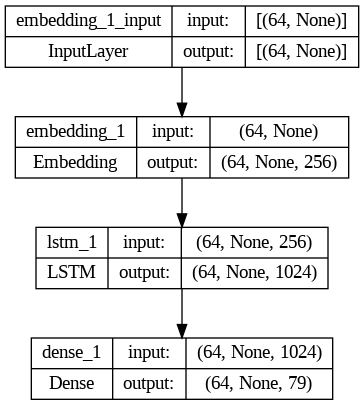

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
    to_file='model.png'
)

## Entrenamiento del modelo

Para entrenar el modelo, utilizamos lo siguiente:

*  [Generación de texto con una RNN](https://www.tensorflow.org/tutorials/text/text_generation) en este notebook, está contenida la documentación de TensorFlow para obtener más detalles sobre los componentes del modelo.

In [ ]:
# Una función objetivo.
# La función se llama con scalar_loss = fn(y_true, y_pred).
def loss(labels, logits):
    entropy = tf.keras.losses.sparse_categorical_crossentropy(
      y_true=labels,
      y_pred=logits,
      from_logits=True
    )

    return entropy

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=loss
)

# Configuración de callbacks

La "detención anticipada" o "early stopping" es una técnica para evitar el sobreajuste y mejorar la eficiencia del proceso de entrenamiento. En el contexto de Keras, la detención anticipada se implementa a menudo a través de **"callbacks"**.

En términos simples, la detención anticipada implica monitorear cierta métrica, como la pérdida en el conjunto de validación, durante el entrenamiento del modelo. Si esta métrica deja de mejorar después de cierto número de épocas, el entrenamiento se detiene antes de completar todas las épocas planificadas. Esto ayuda a evitar que el modelo se sobreajuste al conjunto de entrenamiento y, en cambio, capture patrones generales que se apliquen a datos no vistos.

Utilizamos dos técnicas:

1. **ModelCheckpoint Callback:** Este callback guarda el modelo (guarda los pesos del modelo) en un archivo después de cada época o después de ciertos criterios (como mejorar en la métrica de validación). Esto es útil para guardar el mejor modelo durante el entrenamiento.

2. **EarlyStopping Callback:** Este callback monitorea una métrica (por ejemplo, la pérdida en el conjunto de validación) y detiene el entrenamiento si la métrica no mejora después de un cierto número de épocas. Es una forma de implementar la detención anticipada.

## Detención anticipada de callbacks

Para la detección anticipada de callbacks, tenemos los siguientes parámetros:

1. **`patience=5`:** Este parámetro especifica el número de épocas que el entrenamiento puede continuar sin ver una mejora en la métrica monitoreada antes de detenerse. En este caso, el entrenamiento se detendrá si la pérdida (loss) en el conjunto de entrenamiento no mejora durante 5 épocas consecutivas.

2. **`monitor='loss'`:** Este parámetro indica qué métrica se debe monitorear para decidir si detener o no el entrenamiento. En este caso, se está monitoreando la pérdida en el conjunto de entrenamiento (`'loss'`), pero podrías cambiarlo a otra métrica según tus necesidades, como `'val_accuracy'` para monitorear la precisión en el conjunto de validación.

3. **`restore_best_weights=True`:** Cuando este parámetro está configurado en `True`, restaura los pesos del modelo al mejor punto de control (época) cuando se detiene el entrenamiento. Esto es útil para asegurarse de que el modelo que se guarda al final es el mejor en términos de la métrica monitoreada.

4. **`verbose=1`:** Este parámetro controla la cantidad de información impresa durante el proceso de entrenamiento. Un valor de 1 significa que se imprimirán mensajes verbosos, lo que proporciona información sobre la detención anticipada.


Este callback `EarlyStopping` está configurado para detener el entrenamiento si la pérdida en el conjunto de entrenamiento no mejora durante 5 épocas consecutivas. Cuando se detiene, restaurará los pesos del modelo al mejor punto de control para asegurarse de que el modelo final sea el mejor según la métrica monitoreada. La configuración específica puede variar según los requisitos y el problema específico que estás abordando.

In [ ]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5,
    monitor='loss',
    restore_best_weights=True,
    verbose=1
)

## Puntos de control del modelo que detienen el callback

In [ ]:
# creando el directorio de checkpoints.
checkpoint_dir = 'tmp/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt_{epoch}')
checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True
)

# Ejecutar la muestra de entrenamiento

Para ejecutar la muestra de entrenamiento de nuestro modelo, definimos parámetros globales del modelo, son argumentos utilizados en el método **fit** de **Keras**, que se utiliza para entrenar el modelo:

1.   Los `EPOCHS`, son el número de iteraciones que realizará el modelo.
2.   Los `STEPS_PER_EPOCH`, representan el número de pasos de optimización que se realizan en cada época (epoch).

Normalmente, en cada época el modelo ve el conjunto de datos completo; en este caso, realizarémos menos pasos para acelerar el proceso.


In [ ]:
# EPOCHS = 30
# INITIAL_EPOCH = 0
# STEPS_PER_EPOCH = 10

# EPOCHS = 500
# INITIAL_EPOCH = 1
# STEPS_PER_EPOCH = 1500

EPOCHS = 90
INITIAL_EPOCH = 0
STEPS_PER_EPOCH = 75

print('EPOCHS:          ', EPOCHS)
print('INITIAL_EPOCH:   ', INITIAL_EPOCH)
print('STEPS_PER_EPOCH: ', STEPS_PER_EPOCH)

EPOCHS:           90
INITIAL_EPOCH:    0
STEPS_PER_EPOCH:  75


In [ ]:
history = model.fit(
    x=dataset_train,
    epochs=EPOCHS,
    steps_per_epoch=STEPS_PER_EPOCH,
    initial_epoch=INITIAL_EPOCH,
    callbacks=[
        checkpoint_callback,
        early_stopping_callback
    ]
)

Epoch 1/90
75/75 [==============================] - 58s 681ms/step - loss: 2.5851
Epoch 2/90
75/75 [==============================] - 55s 728ms/step - loss: 1.7817
Epoch 3/90
75/75 [==============================] - 54s 719ms/step - loss: 1.5679
Epoch 4/90
75/75 [==============================] - 54s 723ms/step - loss: 1.4892
Epoch 5/90
75/75 [==============================] - 54s 724ms/step - loss: 1.3603
Epoch 6/90
75/75 [==============================] - 54s 723ms/step - loss: 1.2886
Epoch 7/90
75/75 [==============================] - 54s 727ms/step - loss: 1.2353
Epoch 8/90
75/75 [==============================] - 55s 728ms/step - loss: 1.1824
Epoch 9/90
75/75 [==============================] - 54s 724ms/step - loss: 1.1467
Epoch 10/90
75/75 [==============================] - 54s 724ms/step - loss: 1.0905
Epoch 11/90
75/75 [==============================] - 54s 725ms/step - loss: 1.0835
Epoch 12/90
75/75 [==============================] - 54s 726ms/step - loss: 1.0468
Epoch 13/90
7

In [ ]:
# Saving the trained model to file (to be able to re-use it later).
# Saving the trained model to file using the native Keras format.
path_network = '/content/drive/My Drive/Colab Notebooks/generator_letras/saved_network/'
# model_name = 'letrass_generation_rnn_raw.keras'
#model.save(path_network + model_name)
#path_network = 'drive/My Drive/Colab Notebooks/generator_letras/saved_network/'
model_name = 'letras_generation_rnn_raw.h5'
model.save(path_network + model_name, save_format='h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Visualizando el progreso del entrenamiento

Podemos ver la pérdida cómo evoluciona a través del entrenamiento. De hecho, el modelo converge.

In [ ]:
import os

# Ruta a la carpeta deseada
ruta_deseada = '/content/drive/My Drive/Colab Notebooks/generator_letras/saved_network/'

# Cambiar el directorio de trabajo
os.chdir(ruta_deseada)

# Verificar el nuevo directorio de trabajo
print("Nuevo directorio de trabajo:", os.getcwd())

Nuevo directorio de trabajo: /content/drive/My Drive/Colab Notebooks/generator_letras/saved_network


In [ ]:
def render_training_history(training_history):
    #loss = training_history.history['loss']
    loss = training_history

    plt.title('Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(loss, label='Training set')
    plt.tight_layout()
    plt.legend()

    plt.savefig('/content/drive/MyDrive/Colab Notebooks/generator_letras/saved_network/training_history.png')
    plt.grid(linestyle='--', linewidth=1, alpha=0.5)
    plt.show()

#np.save(path_network + "history_1.npy", history.history['loss'])
history = np.load(path_network + "history_1.npy")
render_training_history(history)

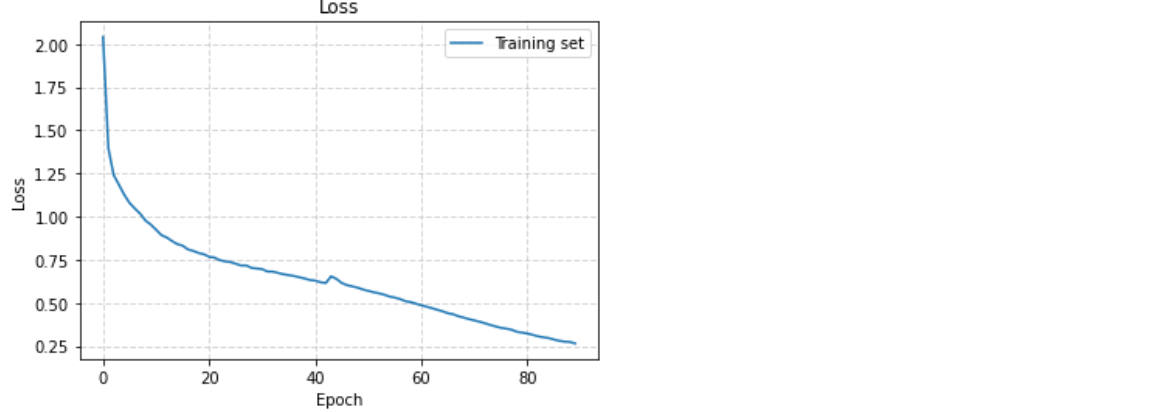

De acuerdo con el gráfico, se puede observar que existe una convergencia para la pérdida de entrenamiento y validación.

## Generador de letras de canciones

Una vez entrenado el modelo, vamos a probar los resultados.

Puesto que hemos guardado el modelo, podemos definirlo nuevamente y cargar o cambiar los pesos, ademàs podemos notar lo siguiente:



*   Para cada carácter de entrada, la matriz `example_batch_predictions` contiene un vector de probabilidades de cuál podría ser el siguiente carácter.
*   Si la probabilidad en la posición 15 en ese vector es, digamos, 0.3 y la probabilidad en la posición 25 es 0.8, significa que deberíamos elegir mejor el carácter con el índice 25 como siguiente carácter.
*   Como queremos que nuestra red genere diferentes letras de canciones (incluso para la misma entrada), no podemos simplemente elegir el valor de probabilidad máxima, porque si lo hiciéramos así, terminaríamos con  la misma letras siempre, es decir, prediciendo la letra por la red una y otra vez. Por lo tanto, lo que haremos en su lugar, será extraer muestras de predicciones (como la impresa arriba) usando la función `tf.random.categorical()`, esto como consecuencia, traerá un poco de confusión a la red. Por ejemplo, supongamos que tenemos el carácter **L** como entrada, luego, al tomar muestras de la distribución categórica, nuestra red puede predecir no solo la palabra LETRA, sino también las palabras LORO y LAUREL, etc.

## Reinciar/restaurar el modelo

Para mantener este paso de predicción simple, restauraremos el modelo guardado y lo reconstruiremos con un tamaño de lote de 1. Debido a la forma en que el estado de la **RNN** se pasa de un paso de tiempo a otro, el modelo solo acepta un tamaño de lote fijo una vez construido. Para ejecutar el modelo con un tamaño de lote diferente, necesitamos reconstruir el modelo y restaurar los pesos desde el punto de control.

In [ ]:
path_network = '/content/drive/MyDrive/Colab Notebooks/generator_letras/saved_network/'

In [ ]:
tf.train.latest_checkpoint(checkpoint_dir)
simplified_batch_size = 1

rnn_units = 1024
embedding_dim = 256


model_simplified = build_model(VOCABULARY_SIZE, embedding_dim, rnn_units, simplified_batch_size)
model_simplified.load_weights(path_network + model_name)
model_simplified.build(tf.TensorShape([simplified_batch_size, None]))
#model.save(path_network +'trained_model.h5', save_format='h5')
model.save_weights(path_network +'weight_model.h5', save_format='h5')
model_simplified.summary()

En el modelo se incluye **el parámetro de temperatura** éste define qué tan confusa o "incoherente" será la letra generada, esto fue inspirado y tomado del notebook que genera recetas de cocina (https://github.com/chef-transformer/chef-transformer).

Los valores más pequeños de temperaturas dan como resultado un texto más predecible. Las temperaturas más altas dan como resultado un texto más exacto y coherente. Necesitamos experimentar para encontrar la mejor configuración. Haremos algunos experimentos con diferentes temperaturas a continuación.

# **Generación de Letras de canciones**

Hasta acá hemos desarrollado el ejercicio utilizando letras y vocabularios en inglés, a continuación mostramos por fin nuestro generador de letras en inglés, líneas más abajo se encuentra el generado de letras en español, con todo su tratamiento.

# **Generación de Letras inglés**

In [ ]:
def generate_text(model, start_string, num_generate = 1000, temperature=1.0):
# Paso de evaluación (generar texto usando el modelo aprendido)

    #padded_start_string = STOP_WORD_TITLE + start_string
    padded_start_string = start_string

    # Convertir nuestra cadena inicial a números (vectorización).
    input_indices = np.array(tokenizer.texts_to_sequences([padded_start_string]))

    # Cadena vacía para almacenar nuestros resultados.
    text_generated = []

    # Tamaño Batch (size == 1).
    model.reset_states()
    for char_index in range(num_generate):
        predictions = model(input_indices)
        # Quitando las dimensiones batch
        predictions = tf.squeeze(predictions, 0)

        # Usar una distribución categórica para predecir el carácter devuelto por el modelo.
        predictions = predictions / temperature
        predicted_id = tf.random.categorical(
            predictions,
            num_samples=1
        )[-1, 0].numpy()

        # Pasamos el carácter predicho como la siguiente entrada al modelo.
        # junto con el estado oculto anterior.
        input_indices = tf.expand_dims([predicted_id], 0)

        next_character = tokenizer.sequences_to_texts(input_indices.numpy())[0]

        text_generated.append(next_character)

    return (padded_start_string + ''.join(text_generated))

In [ ]:
def generate_combinations(model):
    letras_length = 1000
    try_letters = ['Love', 'Time']
    try_temperature = [0.9, 1.0, 0.3]

    for letter in try_letters:
        for temperature in try_temperature:
            generated_text = generate_text(
                model,
                start_string=letter,
                num_generate = letras_length,
                temperature=temperature
            )
            print(f'Attempt: "{letter}" + {temperature}')
            print('-----------------------------------')
            print(generated_text.replace(STOP_SIGN, ""))
            print('\n\n')

In [ ]:
generate_combinations(model_simplified)



```
Attempt: "LOVE" + 0.9
-----------------------------------
STORMS


Through the storms and the pouring rain,
Love is the anchor that eases the pain.
In laughter and tears, side by side,
Love is the constant, our forever guide.


Attempt: "LOVE" + 1.0
-----------------------------------
STARS OF LOVE


In the moonlit night, under stars above,
A melody of passion, it is the song of love.
Whispers in the breeze, secrets to unfold,
In the language of the heart, a story to be told.


Love, oh sweet love, like a gentle dove,
Soaring high on the wings of above.
In every beat, in every rhyme,
Love's the rhythm that stands the test of time.


Painted skies with hues of red,
The canvas of our love, forever spread.
Hand in hand, we dance through the night,
In the symphony of love, everything feels right.


Love, oh sweet love, like a gentle dove,
Soaring high on the wings of above.
In every beat, in every rhyme,
Love's the rhythm that stands the test of time.


Attempt: "LOVE" + 0.3
-----------------------------------
MOONLIGHT GLOW


Underneath the silver moonlight glow,
Love is a melody that starts to grow.
In the quiet whispers of the night,
Our hearts entwined, feeling just right.


Love, a flame that forever burns,
In every twist, in every turn.
Through the echoes of the stars above,
We dancing to the rhythm of pure love.

Like a gentle breeze on a summer day,
Love sweeps our worries far away.
Hand in hand, we face the unknown,
In love is embrace, we've truly grown.


Attempt: "TIME" + 0.9
-----------------------------------
CLIMB NOCTURNAL


Moonlight serenades, a nocturnal rhyme,
Stars shimmer above, in the vast design.
In the silence, hear the hours chime,
A timeless ballad, a celestial climb.



Attempt: "TIME" + 1.0
-----------------------------------
TICKING CLOCK


In the ticking of the clock, a rhythm so divine,
Each second whispers stories, a melody through time.
Sunsets and sunrises paint the canvas of the sky,
A timeless symphony, where moments never die.


Time, a gentle river flowing, Carries memories,
Ever growing. With every heartbeat, a new rhyme,
Dancing through the lyrics of this fleeting time.


Seasons change, a waltz of colors in the air,
Nature ballet, a dance so rare. Yesterday are echoes,
a nostalgic chime, In the grand ballroom of this fleeting time.


Time, a gentle river flowing, Carries memories,
Ever growing. With every heartbeat, a new rhyme,
Dancing through the lyrics of this fleeting time.



Attempt: "TIME" + 0.3
-----------------------------------
SWEETEST WIND


In the quiet moments of the night,
A whisper of time, a soft delight.
Silhouettes of memories, like a fragile rhyme,
Painting the canvas of this fleeting time.


Time, a gentle river, flowing free,
Carrying tales of you and me.
With every heartbeat, a rhythm so fine,
Lost in the verses of this fleeting time.


Footprints on the sands, echoes in the wind,
The past and future in a dance, intertwined.
Clocks may tick, but love's the sweetest chime,
A melody echoing through the corridors of time.

```


## **Generador de letras en Español**

Presentamos el generador de letras en español y el tratamiento desarrollado, para esto, se entrenó el conjunto de datos de canciones en español descargado de Kaggle, el cual contenía canciones en español, se entrenaron los datos utilizando el optimizador **Adadelta** el cual es una mejora a **Adagrad**, que busca reducir el decrecimiento monotónico del learning rate del que sufre éste debido a la naturaleza del cache, C, además utilizamos **GPT-2**, ambos importados de `Hugging Face`.

In [ ]:
# Informacion del modelo ------------------------------------------------------\
max_length = 1000 # Longitud maxima de los poemas
modelo_gpt = "DeepESP/gpt2-spanish" # Modelo pre entrenado
RANDOM_SEED = 2019 # Semilla

In [ ]:
print(list(letras_esp_df['string'])[3])


APUNTE INTERIOR


Hoy mi vida no tiene peso alguno:
es un viento, menos que un viento, menos
que una raya de luz.
                                       Ahora ninguno
puede serme oneroso.
                                                  No hay terrenos
resquemores debajo de mi alma.

Mi sangre es una roja armonía viva.
Estoy en armonía con la brasa y la calma,
con la voz amorosa y la voz vengativa.

Parece que mis manos no existieran, parece
que mi cuerpo nadara en un agua inocente.
Como un viento desnudo de mi corazón se mece
y hace sonar campanadas dulcemente.


# **Generador de tokens**

Este generador se realizó para el modelo `DeepESP/gpt2-Español`.

In [ ]:
df = letras_esp_df['string'] # Datos
# Tokenizador del modelo pre entrenado ----------------------------------------\
tokenizer = GPT2Tokenizer.from_pretrained(modelo_gpt)
special_tokens_dict = {'bos_token': '<BOS>', 'eos_token': '<EOS>', 'pad_token': '<PAD>'}
num_added_tokens = tokenizer.add_special_tokens(special_tokens_dict)

In [ ]:
# Tokenizador del modelo ------------------------------------------------------\
class DataTokens(Dataset):
  def __init__(self, data, tokenizer, gpt2_type="gpt2", max_length=max_length):
    self.tokenizer = tokenizer
    self.input_ids = []
    self.attn_masks = []
    for row in data:
      self.encodings_dict = self.tokenizer('<BOS>' + row + '<EOS>', padding="max_length", truncation=True, max_length=max_length)
      self.input_ids.append(torch.tensor(self.encodings_dict['input_ids']))
      self.attn_masks.append(torch.tensor(self.encodings_dict['attention_mask']))
  def __len__(self):
    return len(self.input_ids)
  def __getitem__(self, idx):
    return self.input_ids[idx], self.attn_masks[idx]
# Clase de los datos ----------------------------------------------------------\
class DataModule():
  # Definimos un tamaño de lote en la clase
  def __init__(self, dataset, tokenizer, gpt2_type="gpt2", p = 0.8):
      super(DataModule,self).__init__()
      self.dataset = dataset
      self.tokenizer = tokenizer
      self.p = p
      self.gpt2_type = gpt2_type
  # Definimos el tratamiento de los datos
  def train_val_split(self, split, dataset):
    train_size = int(split * len(dataset))
    val_size = len(dataset) - train_size
    return train_size, val_size
  def setup(self, stage=None):
    self.dataset = DataTokens(self.dataset, self.tokenizer, gpt2_type=self.gpt2_type)
    train_size, val_size = self.train_val_split(self.p, self.dataset)
    self.train_dataset, self.val_dataset = random_split(self.dataset, [train_size, val_size])
  # Iterable de entrenamiento
  def train_dataloader(self, batch_size = 32):
      return torch.utils.data.DataLoader(self.train_dataset, batch_size=batch_size)
  # Iterable de validacion
  def val_dataloader(self, batch_size = 32):
      return torch.utils.data.DataLoader(self.val_dataset, batch_size=batch_size)

# **Reentrenamiento del modelo**

Mostramos el reentrenamiento para el modelo `DeepESP/gpt2 - Español`.

In [ ]:
# Fijar semillas --------------------------------------------------------------\
torch.cuda.manual_seed_all(RANDOM_SEED)
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

In [ ]:
# Acumulación de lotes
def pack_tensor(new_tensor, packed_tensor, max_seq_len):
    if packed_tensor is None:
        return new_tensor, True, None
    if new_tensor[0].size()[1] + packed_tensor[0].size()[1] > max_seq_len:
        return packed_tensor, False, new_tensor
    else:
        packed_tensor = [torch.cat([new_tensor[0], packed_tensor[0][:, 1:]], dim=1)
          ,torch.cat([new_tensor[1], packed_tensor[1][:, 1:]], dim=1)]
        return packed_tensor, True, None
# Entrenamiento del modelo ----------------------------------------------------\
class Trainer_poet():
    def __init__(self, dataset, model, batch_size=16, epochs=5, learning_rate = 1e-4, eps = 1e-8, warmup_steps=50):
      # DataLoaders
      self.data_loader = dataset
      self.data_loader.setup()
      self.train_dataloader = self.data_loader.train_dataloader(batch_size = 1)
      self.val_dataloader = self.data_loader.val_dataloader(batch_size = 1)
      # Modelo
      self.model = model
      self.batch_size = batch_size
      self.epochs = epochs
      self.optimizer = AdamW(model.parameters(), lr=learning_rate, eps=eps)
      total_steps = len(self.train_dataloader) * epochs
      self.scheduler = get_linear_schedule_with_warmup(optimizer=self.optimizer,num_warmup_steps=warmup_steps,num_training_steps=total_steps)
    def train(self):
      device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
      model = self.model
      optimizer =  self.optimizer
      scheduler = self.scheduler
      model.to(device)
      model.train()
      start_time = time.time()
      training_stats = []
      # Entrenamiento
      print('Inicio entrenamiento ....')
      train_dataloader = self.train_dataloader
      val_dataloader = self.val_dataloader
      for epoch_i in range(self.epochs):
        print(f'Epoch {epoch_i + 1} de {self.epochs}')
        t0 = time.time()
        total_train_loss = 0
        input_tensor = None
        accumulating_batch_count = 0
        for step, batch in enumerate(train_dataloader):
          (input_tensor, carry_on, remainder) = pack_tensor(batch, input_tensor, 768)
          if carry_on and step != len(train_dataloader) - 1: continue

          b_input_ids = input_tensor[0].to(device)
          b_masks = input_tensor[1].to(device)
          input_tensor = [b_input_ids, b_masks]
          outputs = model(b_input_ids,labels=b_input_ids,attention_mask=b_masks)
          loss = outputs[0]
          loss.backward()
          if (accumulating_batch_count % self.batch_size) == 0:
            batch_loss = loss.item()
            total_train_loss += batch_loss
            optimizer.step()
            scheduler.step()
            optimizer.zero_grad()
            model.zero_grad()
          accumulating_batch_count += 1
          input_tensor = None
        avg_train_loss = total_train_loss / len(train_dataloader)
        training_time = format_time(time.time() - t0)
        print(f'Average Training Loss: {avg_train_loss}. Epoch Training Time: {training_time}')
        # Validación
        t0 = time.time()
        model.eval()
        total_eval_loss = 0
        nb_eval_steps = 0
        for batch in val_dataloader:
          b_input_ids = batch[0].to(device)
          b_masks = batch[1].to(device)
          with torch.no_grad():
            outputs  = model(b_input_ids,attention_mask=b_masks,labels=b_input_ids)
            loss = outputs[0]
          batch_loss = loss.item()
          total_eval_loss += batch_loss
        avg_val_loss = total_eval_loss / len(val_dataloader)
        validation_time = format_time(time.time() - t0)
        print(f'Average Validation Loss: {avg_val_loss}')
        # Guardar estadísticas
        training_stats.append(
            {
              'epoch': epoch_i + 1,
              'Training Loss': avg_train_loss,
              'Valid. Loss': avg_val_loss,
              'Training Time': training_time,
              'Validation Time': validation_time
             }
          )
      self.training_stats = training_stats
      self.model = model
      print(f'Total Training Time: {format_time(time.time()-start_time)}')
      return model

In [ ]:
configuration = GPT2Config(vocab_size=len(tokenizer), n_positions=max_length).from_pretrained(modelo_gpt, output_hidden_states=True)
model_gpt2_esp = GPT2LMHeadModel.from_pretrained(modelo_gpt, config=configuration)
model_gpt2_esp.resize_token_embeddings(len(tokenizer))

Dataset = DataModule(df, tokenizer, gpt2_type=modelo_gpt)
Trainer_model = Trainer_poet(Dataset, model_gpt2_esp, epochs=15, batch_size=32)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
model = Trainer_model.train()
torch.save(model, 'modelo_gpt2_letras.pt')

Inicio entrenamiento ....
Epoch 1 de 15
Average Training Loss: 0.03805895720637554. Epoch Training Time: 0:08:21
Average Validation Loss: 0.670541517235993
Epoch 2 de 15
Average Training Loss: 0.01002149633197879. Epoch Training Time: 0:08:02
Average Validation Loss: 0.6155510512800628
Epoch 3 de 15
Average Training Loss: 0.009405404144618396. Epoch Training Time: 0:08:03
Average Validation Loss: 0.6017429699577792
Epoch 4 de 15
Average Training Loss: 0.009058128709960254. Epoch Training Time: 0:08:01
Average Validation Loss: 0.5960586443860031
Epoch 5 de 15
Average Training Loss: 0.008778137289430872. Epoch Training Time: 0:08:02
Average Validation Loss: 0.5933551928582509
Epoch 6 de 15
Average Training Loss: 0.008516633424053111. Epoch Training Time: 0:08:04
Average Validation Loss: 0.5923467134956598
Epoch 7 de 15
Average Training Loss: 0.008257856771940887. Epoch Training Time: 0:08:03
Average Validation Loss: 0.5926220466939485
Epoch 8 de 15
Average Training Loss: 0.00799357608256

In [ ]:
df_stats = pd.DataFrame(data=Trainer_model.training_stats)
df_stats

,epoch,Training Loss,Valid. Loss,Training Time,Validation Time
0,1,0.038059,0.670542,0:08:21,0:01:23
1,2,0.010021,0.615551,0:08:02,0:01:23
2,3,0.009405,0.601743,0:08:03,0:01:23
3,4,0.009058,0.596059,0:08:01,0:01:23
4,5,0.008778,0.593355,0:08:02,0:01:23
5,6,0.008517,0.592347,0:08:04,0:01:23
6,7,0.008258,0.592622,0:08:03,0:01:23
7,8,0.007994,0.594029,0:08:02,0:01:23
8,9,0.007719,0.596488,0:08:03,0:01:23
9,10,0.007427,0.599895,0:08:03,0:01:23


In [ ]:
fig = go.Figure([
        go.Scatter(x=df_stats['epoch'], y=df_stats['Training Loss'],name="Train",hovertemplate="%{y}%{_xother}")
        ,go.Scatter(x=df_stats['epoch'], y=df_stats['Valid. Loss'],name="Val",hovertemplate="%{y}%{_xother}")
        ])
fig.update_layout(
      xaxis_title="Epoch",
      yaxis_title='Loss',
      hovermode="x unified"
  )
fig.show()

Finalmente, llegamos al resultado principal de este modelo. Repetimos diferentes palabras iniciales y diferentes temperaturas obteniendo diferentes letras de canciones por la red de los dos modelos. Observemos cómo las letras de canciones generadas no coinciden con ninguna otra letra del conjunto de datos de entrenamiento, a continuación, mostramos los resultados de letras tanto para español, como para inglés.

# **Generación de Letras español**

In [ ]:
model = torch.load('modelo_gpt2_letras.pt')

In [ ]:
model.to('cpu')

GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50260, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50260, bias=False)
)

In [ ]:
def Generate2(model,Palabra):
  input_ids = tokenizer.encode(Palabra, return_tensors="pt")
  output = model.generate(
      input_ids,
      do_sample=True,
      top_k=50,
      max_length=200,
      top_p=0.95,
      num_return_sequences=1,
      #temperature=1.5
      #no_repeat_ngram_size=2,
  )
  output = tokenizer.decode(output[0], skip_special_tokens=True)
  return output

Ahora sí, vamos a probar el modelo y obtenemos las letras de canciones en español, hicimos el ejercicio para tres palabras diferentes y un valor fijo de temperatura en todos los casos.

In [ ]:
Palabra = 'AMOR'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


AMOR DE CÓRDOBA


Yace en la playa
el niño hermoso,
que entre sus brazos
el sol te llama.

Con su graciosa mano
note la tierna carne
que se alegra el cuerpo.

Después
quedó la noche sin estrellas
y en su boca un racimo
del árbol de la selva
la pálida espuma
que se besa al sol en los labios.

Yace en la playa,
yace en la playa
el niño hermoso,
yace en la playa
el niño hermoso,
yace en la playa
el niño hermoso,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva,
yace en la selva
yace en la selva,



In [ ]:
Palabra = 'TIEMPO'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


TIEMPO


He aquí la ética de la seducción, y también de la tolerancia en la lucha de clases y clases, el cual, si llega a ser tolerante, no tendrá por qué ser tolerante. Si esta estrategia antisocialista se agrafará, si, o no se agrafará, y la moral humana no será tolerante. Esta ética antisocialista se agrafará porque no se le da en el blanco de imponer sus propias libertades, a imponer sus propias libertades. Si esta estrategia antisocialista se agrafará en sí misma porque, como está ordenado, no se le da en el blanco de imponer sus propias libertades. Si esta ética antisocialista se agrafará porque ella sigue creyendo antisocialista, y, por qué no, porque se va a cambiar de enemigo. Esta ética antisocialista antisocialista es, en cierto sentido, ética antisocialista: no se le da en el blanco de imponer sus propias libertades sino,


In [ ]:
Palabra = 'NOCHE'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


NOCHE DE SILENCIO


La palabra es un arma. Temo, a veces, que haya alguna hoja de papel, algún vaso, alguna botella. ¿Qué te dice a ti, de repente, lo que pasa? En un arranque, comprendo que en mi vida nada había sido tan cruel. Pero en cambio, al hablar contigo me duele, como cuando me duele un cuchillo. Cuando no estás con Dios, con el que nunca estuve, ¿sabes adónde voy o qué hago en el mar sin amarrarme al océano, sin ver la costa, sin amararme al mar? ¿Te duele el mar? ¿Te duele? No me tientes al brazo para dejarme. Si te coge, me rompo el vendaje; y si no, me hundo de espalda, en las arenas mojadas, donde nunca estuve, donde nunca estuve.
El viento frío de abril derrite mi frente y mis cabellos. La noche cae silenciosa sobre mi rostro. Te quiero tanto que


In [ ]:
Palabra = 'LUZ'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


LUZARO


¿Qué haces con la ropa de calle?

Si supiera de antemano que te tiras a mis brazos,
el color de la tarde lo miraría con otros ojos...

Entonces me miraría como un loco.

Si supieses que me has atraído a ti,
de modo inconsciente, reconocería la mirada
que me miras?

¿Por qué me miras a la cara?

¿Te vas a quedar sin aliento y sin sangre,
y yo, sintiéndome como la mujer,
cerrada en mi pecho y sin conciencia,
que es lo que a ti te gusta...

¿Es eso?

¿Es eso?

    


In [ ]:
Palabra = 'LUNA'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


LUNA VUELTA Y VENDEADES


Me encontré con la muerte en los ojos, cuando hablaba; era ella, la que me miraba desde dentro, con mi presencia, con su calor. Tú eras la causa de la muerte; fuiste para mí el consuelo de la vida. ¡Tú eras por fin aquella causa de la muerte! Ella te miraba desde dentro, y yo la oía gritar, como si tú y yo hubiéramos sido algo, y para que tú y yo, juntos, sintiéramos todavía el mismo dolor; yo no sabía ya, ni tenía conocimiento de que estabas viva; ella no supe que estabas viva, ni que había muerto. Yo la veía y la veía, y yo la sentía lejos, lejos de mí, y ella me miraba lejos. El alma y la carne estaban así y yo la oía llorar, y yo la veía llorar otra vez. 

Yo me sentía solo para ella, para esta pobre niña, y para ti no existía. Tú eras


In [ ]:
Palabra = 'LIBERTAD'
text = Generate2(model.to('cpu'),Palabra)
print(text)

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


LIBERTAD G. FRAZ GATLANO


Te quiero desde que eras pequeña,
mujerie mía,
que nostalgiaste en el año 1936
como el resto de las primaveras,
como todo el amor que aún era,
para siempre en esta vida
perdida en el espacio sin fin
de la vida que se va
con el hombre,
como todo el dolor
de la vida
esperándote en el tiempo
(cuando te conocí).
                                                      Y en esta triste
deslizando en esta tierra
la infelicidad con que nos hemos escapado
y nos hemos escapado, sin saber el porqué,
de una noche de lluvia 
en estos días


### **FIN DEL DOCUMENTO**